# GORILLA

## Data preparation

In [19]:
import pandas as pd
import math
import csv

In [5]:
genes_fi = pd.read_excel('../raw_data/41592_2018_45_MOESM4_ESM.xlsx', skiprows = 6)
genes_fi = genes_fi.loc[:,['Standard Name', 'intensity']]
genes_fi.rename(columns = {'Standard Name':'gene'}, inplace = True)
genes_fi = genes_fi.loc[genes_fi.intensity.notna()]
genes_fi = genes_fi.loc[genes_fi.intensity > 0]
# genes_fi.intensity, _ = stats.boxcox(genes_fi.intensity)
fi_trans = [math.log(fi) for fi in genes_fi.intensity]
genes_fi.intensity = fi_trans
genes_fi = genes_fi.loc[genes_fi.intensity > -20]
genes_fi

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,gene,intensity
0,SSA1,2.477076
1,ERP2,-1.204719
2,FUN14,-0.785451
3,SPO7,-3.608608
5,SWC3,-3.443864
...,...,...
5247,OPT2,-5.350277
5248,NaN,-4.446225
5250,SGE1,-6.448889
5252,ARR2,-4.412007


<AxesSubplot:>

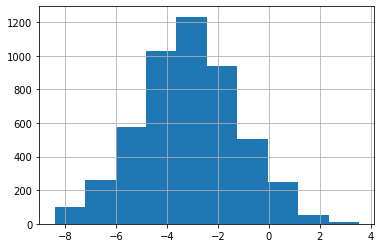

In [13]:
genes_fi.intensity.hist()

## GO enrichment for top genes

In [29]:
df = genes_fi.sort_values(by = ['intensity'], ascending = False).dropna()
df

,gene,intensity
2003,TDH3,3.546813
3227,PDC1,3.521146
505,PGK1,3.111120
251,HSP26,3.011110
1519,HSP12,2.998025
...,...,...
3188,PAU18,-7.582484
1510,VTC2,-7.589336
1265,FIT1,-7.601402
4475,IMA2,-7.726654


In [30]:
pd.Series(df.gene).to_csv('../processed_data/ranked_fi.csv', header = False, index = False)

In [31]:
pd.Series(df.gene[df.intensity > 0]).to_csv('../processed_data/top_fi.csv', header = False, index = False)

Results:
    
Target and background lists:
    
    biological process: http://cbl-gorilla.cs.technion.ac.il/GOrilla/rxt5vfdf/GOResults.html
    
    molecular function: http://cbl-gorilla.cs.technion.ac.il/GOrilla/8gu3xken/GOResults.html#enrich_info
            
    cellular component: http://cbl-gorilla.cs.technion.ac.il/GOrilla/xixuk282/GOResults.html
    
Single ranked list:

    http://cbl-gorilla.cs.technion.ac.il/GOrilla/k0cqq4fr/GOResults.html

## GO enrichment for bottom genes

In [33]:
df = genes_fi.sort_values(by = ['intensity']).dropna()
df

,gene,intensity
357,RIM2,-8.216628
4475,IMA2,-7.726654
1265,FIT1,-7.601402
1510,VTC2,-7.589336
3188,PAU18,-7.582484
...,...,...
1519,HSP12,2.998025
251,HSP26,3.011110
505,PGK1,3.111120
3227,PDC1,3.521146


In [34]:
pd.Series(df.gene).to_csv('../processed_data/inverse_ranked_fi.csv', header = False, index = False)

In [35]:
pd.Series(df.gene[df.intensity < -6]).to_csv('../processed_data/bottom_fi.csv', header = False, index = False)

Results:

Target and background lists:
    
    biological process: http://cbl-gorilla.cs.technion.ac.il/GOrilla/gx67jfcn/GOResults.html

    molecular function: http://cbl-gorilla.cs.technion.ac.il/GOrilla/o5zgvrsp/GOResults.html

    cellular component: http://cbl-gorilla.cs.technion.ac.il/GOrilla/z59tcq12/GOResults.html
    
Single ranked list:

http://cbl-gorilla.cs.technion.ac.il/GOrilla/6o32ggd3/GOResults.html